In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import sort_dataframeby_monthorweek as sd

In [3]:
df=pd.read_csv('hotel_bookings__2.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df1=df.drop('reservation_status_date',axis=1)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18968 entries, 0 to 18967
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           18968 non-null  object 
 1   is_canceled                     18968 non-null  int64  
 2   lead_time                       18968 non-null  int64  
 3   arrival_date_year               18968 non-null  int64  
 4   arrival_date_month              18968 non-null  object 
 5   arrival_date_week_number        18968 non-null  int64  
 6   arrival_date_day_of_month       18968 non-null  int64  
 7   stays_in_weekend_nights         18968 non-null  int64  
 8   stays_in_week_nights            18968 non-null  int64  
 9   adults                          18968 non-null  int64  
 10  children                        18968 non-null  int64  
 11  babies                          18968 non-null  int64  
 12  meal                            

In [7]:
df1.shape

(18968, 31)

In [8]:
df1.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3709
company                           17345


In [9]:
def data_clean(df1):
    df1.fillna(0,inplace=True)
    print(df1.isnull().sum())

In [10]:
data_clean(df1)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18963,Resort Hotel,0,2,2016,February,6,1,1,1,1,...,0,No Deposit,240.0,0.0,0,Transient,39.0,0,1,Check-Out
18964,Resort Hotel,0,2,2016,March,11,7,1,0,1,...,0,No Deposit,240.0,0.0,0,Transient,43.0,0,2,Check-Out
18965,Resort Hotel,0,1,2016,April,15,6,0,2,1,...,0,No Deposit,240.0,0.0,0,Transient,56.0,0,1,Check-Out
18966,Resort Hotel,0,0,2016,June,26,21,0,1,1,...,0,No Deposit,15.0,0.0,0,Transient,79.0,0,1,Check-Out


In [12]:
len(df1[df1['adults']==0])

7

In [13]:
filter=(df1['children']==0) & (df1['adults']==0) & (df1['babies']==0)
df1[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,1,No Deposit,0.0,174.0,0,Transient-Party,0.0,0,0,Check-Out
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,No Deposit,0.0,174.0,0,Transient,0.0,0,0,Check-Out
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,38.0,0.0,0,Transient-Party,0.0,0,0,Check-Out
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,308.0,0.0,122,Transient-Party,0.0,0,0,Check-Out
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,308.0,0.0,122,Transient-Party,0.0,0,0,Check-Out
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,0,No Deposit,0.0,383.0,0,Transient,0.0,0,0,Canceled
9376,Resort Hotel,1,0,2016,November,48,21,0,0,0,...,0,No Deposit,0.0,386.0,0,Group,0.0,0,0,Canceled


In [14]:
pd.set_option('display.max_columns',25)

In [15]:
filter=(df1['children']==0) & (df1['adults']==0) & (df1['babies']==0)
df1[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0,0,...,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.0,0,0,Check-Out
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0,0,...,A,I,0,No Deposit,0.0,174.0,0,Transient,0.0,0,0,Check-Out
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0,0,...,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.0,0,0,Check-Out
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0,0,...,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.0,0,0,Check-Out
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0,0,...,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.0,0,0,Check-Out
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0,0,...,P,P,0,No Deposit,0.0,383.0,0,Transient,0.0,0,0,Canceled
9376,Resort Hotel,1,0,2016,November,48,21,0,0,0,0,0,...,P,P,0,No Deposit,0.0,386.0,0,Group,0.0,0,0,Canceled


In [16]:
data=df1[~filter]


In [17]:
data.shape,df1.shape

((18961, 31), (18968, 31))

In [18]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,...,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,...,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,...,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,...,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,...,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out


In [19]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','No of guests']
country_wise_data

,country,No of guests
0,PRT,3076
1,GBR,1541
2,ESP,866
3,IRL,453
4,0,407
...,...,...
69,AGO,1
70,ZMB,1
71,COL,1
72,IRN,1


In [20]:
data2=data[data['is_canceled']==0]

In [21]:
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,...,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,...,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,...,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,...,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,...,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18963,Resort Hotel,0,2,2016,February,6,1,1,1,1,0,0,...,A,D,0,No Deposit,240.0,0.0,0,Transient,39.0,0,1,Check-Out
18964,Resort Hotel,0,2,2016,March,11,7,1,0,1,0,0,...,A,D,0,No Deposit,240.0,0.0,0,Transient,43.0,0,2,Check-Out
18965,Resort Hotel,0,1,2016,April,15,6,0,2,1,0,0,...,A,D,0,No Deposit,240.0,0.0,0,Transient,56.0,0,1,Check-Out
18966,Resort Hotel,0,0,2016,June,26,21,0,1,1,0,0,...,A,F,0,No Deposit,15.0,0.0,0,Transient,79.0,0,1,Check-Out


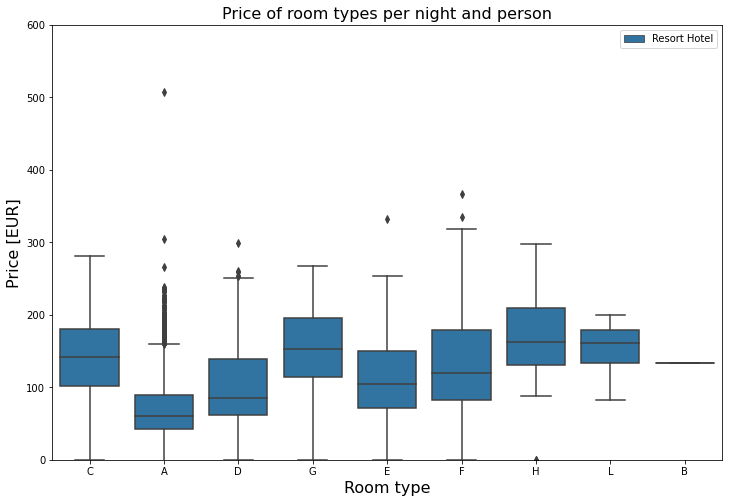

In [22]:
# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=data2)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

In [23]:
data_resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
data_city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

In [24]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,...,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,...,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,...,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,...,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,...,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out


In [25]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,63.186287
1,August,153.723588
2,December,62.227905
3,February,46.555094
4,January,40.239838
5,July,125.984013
6,June,86.600609
7,March,55.709722
8,May,63.936131
9,November,45.498417


In [26]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr


In [27]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel


In [28]:
def sort_data(df1,colname):
    return sd.Sort_Dataframeby_Month(df1,colname)


In [29]:
final=sort_data(final,'month')
final

,month,price_for_resort,price_for_city_hotel


In [30]:
final.dtypes

month                   object
price_for_resort        object
price_for_city_hotel    object
dtype: object

### Conclusion-->> This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here)., The price of the city hotel varies less and is most expensive during spring and autumn.

# Which are the most busy month or in which months Guests are high?

In [31]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,...,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,...,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,...,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,...,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,...,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out


In [32]:
data_resort.shape

(7999, 31)

In [33]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

,month,no of guests
0,October,1346
1,September,1242
2,July,1186
3,August,1140
4,November,973
5,December,401
6,May,398
7,April,342
8,March,324
9,February,265


In [34]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

,month,no of guests


In [35]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no of guests in resort','no of guest in city hotel']
final_rush

,month,no of guests in resort,no of guest in city hotel


In [36]:
final_rush=sort_data(final_rush,'month')
final_rush

,month,no of guests in resort,no of guest in city hotel


In [37]:
final_rush.dtypes

month                        object
no of guests in resort       object
no of guest in city hotel    object
dtype: object

In [38]:
final_rush.columns

Index(['month', 'no of guests in resort', 'no of guest in city hotel'], dtype='object')

### Conclusion
     The City hotel has more guests during spring and autumn, when the prices are also highest.
    In July and August there are less visitors, although prices are lower.

    Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
    Both hotels have the fewest guests during the winter.

# How long do people stay at the hotels?

In [39]:
filter=data['is_canceled']==0
clean_data=data[filter]

In [40]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,...,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,...,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,...,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,...,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,...,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out


In [41]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

In [42]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,...,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,...,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,...,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,...,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,...,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2


In [43]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay.head()

,total_nights,hotel,is_canceled
0,0,Resort Hotel,107
1,1,Resort Hotel,1567
2,2,Resort Hotel,1365
3,3,Resort Hotel,937
4,4,Resort Hotel,896


In [44]:
stay=stay.rename(columns={'is_canceled':'Number of stays'})
stay.head()

,total_nights,hotel,Number of stays
0,0,Resort Hotel,107
1,1,Resort Hotel,1567
2,2,Resort Hotel,1365
3,3,Resort Hotel,937
4,4,Resort Hotel,896


<AxesSubplot:xlabel='total_nights', ylabel='Number of stays'>

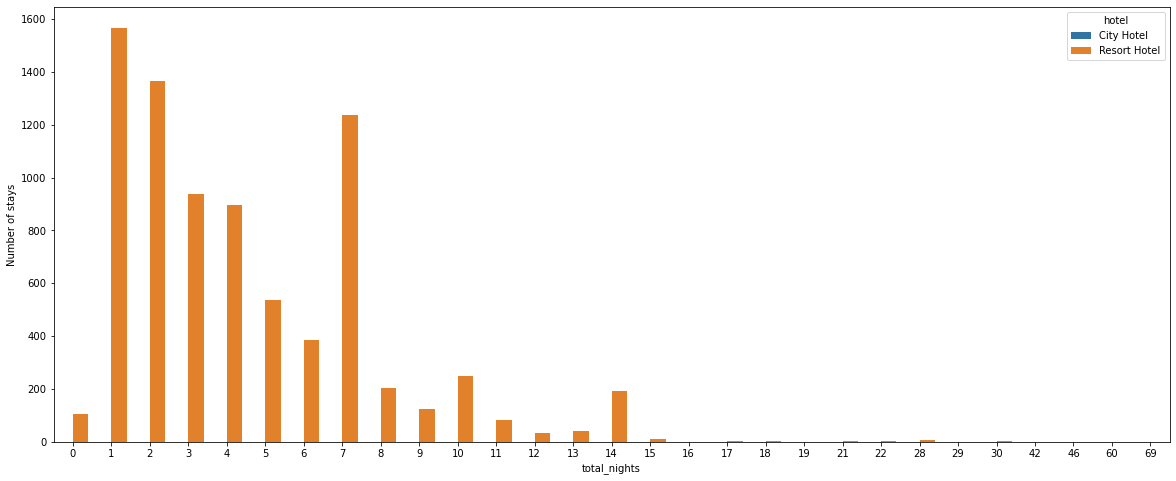

In [45]:
plt.figure(figsize=(20, 8))
sns.barplot(x = "total_nights", y = "Number of stays" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=stay)

# Select important Features using Co-relation

In [46]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,...,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,...,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,...,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,...,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,...,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out


In [47]:
co_relation=data.corr()
co_relation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.172611,0.518976,-0.224949,-0.012375,0.074270,0.046646,0.093684,0.111517,-0.019550,-0.173141,0.080987,-0.167605,-0.144328,0.221569,-0.174794,-0.092523,0.170926,-0.336252,-0.083067
lead_time,0.172611,1.000000,0.176144,-0.000680,-0.058239,0.248754,0.300997,0.125445,-0.023303,-0.005198,-0.143359,0.109479,-0.145150,0.049717,0.049303,-0.061185,0.085039,-0.044751,-0.146593,-0.062166
arrival_date_year,0.518976,0.176144,1.000000,-0.583021,0.018617,0.037592,0.028926,-0.012140,0.109591,-0.042523,0.055157,-0.100131,0.099713,-0.019966,0.150501,-0.030033,-0.045642,0.162371,-0.167098,-0.024491
arrival_date_week_number,-0.224949,-0.000680,-0.583021,1.000000,0.063227,0.001706,-0.005201,0.016299,-0.024239,0.027372,-0.094320,0.045749,-0.091746,0.051608,-0.059203,0.027906,0.102189,0.033724,0.084386,0.032833
arrival_date_day_of_month,-0.012375,-0.058239,0.018617,0.063227,1.000000,-0.087563,-0.071018,-0.006606,0.006436,-0.008289,-0.002698,-0.064356,0.005225,0.005198,-0.033097,0.026152,0.057750,0.023104,0.005323,0.003628
stays_in_weekend_nights,0.074270,0.248754,0.037592,0.001706,-0.087563,1.000000,0.721608,0.079824,0.055734,0.023681,-0.094461,-0.014434,-0.113031,0.044725,0.114243,-0.149073,-0.026834,0.115978,-0.059499,0.066706
stays_in_week_nights,0.046646,0.300997,0.028926,-0.005201,-0.071018,0.721608,1.000000,0.069166,0.048555,0.023591,-0.121663,-0.016931,-0.108505,0.078107,0.110568,-0.088394,0.030246,0.123359,-0.056900,0.078159
adults,0.093684,0.125445,-0.012140,0.016299,-0.006606,0.079824,0.069166,1.000000,0.054608,0.012466,-0.097626,0.005752,-0.121004,-0.023007,0.064021,-0.133561,-0.011009,0.133345,-0.019701,0.039182
children,0.111517,-0.023303,0.109591,-0.024239,0.006436,0.055734,0.048555,0.054608,1.000000,0.009172,-0.041042,-0.029827,-0.041355,0.029122,0.110649,-0.072115,-0.026903,0.381134,0.002736,0.013784
babies,-0.019550,-0.005198,-0.042523,0.027372,-0.008289,0.023681,0.023591,0.012466,0.009172,1.000000,-0.016758,-0.010673,-0.016076,0.065800,-0.003412,-0.012464,-0.009378,0.052114,0.027885,0.126922


In [48]:
co_relation=data.corr()["is_canceled"]
co_relation

is_canceled                       1.000000
lead_time                         0.172611
arrival_date_year                 0.518976
arrival_date_week_number         -0.224949
arrival_date_day_of_month        -0.012375
stays_in_weekend_nights           0.074270
stays_in_week_nights              0.046646
adults                            0.093684
children                          0.111517
babies                           -0.019550
is_repeated_guest                -0.173141
previous_cancellations            0.080987
previous_bookings_not_canceled   -0.167605
booking_changes                  -0.144328
agent                             0.221569
company                          -0.174794
days_in_waiting_list             -0.092523
adr                               0.170926
required_car_parking_spaces      -0.336252
total_of_special_requests        -0.083067
Name: is_canceled, dtype: float64

In [49]:
co_relation.abs().sort_values(ascending=False)

is_canceled                       1.000000
arrival_date_year                 0.518976
required_car_parking_spaces       0.336252
arrival_date_week_number          0.224949
agent                             0.221569
company                           0.174794
is_repeated_guest                 0.173141
lead_time                         0.172611
adr                               0.170926
previous_bookings_not_canceled    0.167605
booking_changes                   0.144328
children                          0.111517
adults                            0.093684
days_in_waiting_list              0.092523
total_of_special_requests         0.083067
previous_cancellations            0.080987
stays_in_weekend_nights           0.074270
stays_in_week_nights              0.046646
babies                            0.019550
arrival_date_day_of_month         0.012375
Name: is_canceled, dtype: float64

In [50]:
co_relation.abs().sort_values(ascending=False)[1:]

arrival_date_year                 0.518976
required_car_parking_spaces       0.336252
arrival_date_week_number          0.224949
agent                             0.221569
company                           0.174794
is_repeated_guest                 0.173141
lead_time                         0.172611
adr                               0.170926
previous_bookings_not_canceled    0.167605
booking_changes                   0.144328
children                          0.111517
adults                            0.093684
days_in_waiting_list              0.092523
total_of_special_requests         0.083067
previous_cancellations            0.080987
stays_in_weekend_nights           0.074270
stays_in_week_nights              0.046646
babies                            0.019550
arrival_date_day_of_month         0.012375
Name: is_canceled, dtype: float64

In [51]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [52]:
data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out              7999
1            Canceled              10690
             No-Show                 272
Name: reservation_status, dtype: int64

In [53]:
list_not=['days_in_waiting_list','arrival_date_year']

In [54]:
num_features=[col for col in data.columns if data[col].dtype!='O' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [55]:
cat_not=['arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country','days_in_waiting_list']

In [56]:
cat_features=[col for col in data.columns if data[col].dtype=='O' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

In [57]:
data_cat=data[cat_features]

In [58]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient


In [59]:
data_cat['cancellation']=data['is_canceled']

In [60]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'cancellation'],
      dtype='object')

In [61]:
cols=data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [62]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean())
    print('\n')

hotel
Resort Hotel    0.578134
Name: cancellation, dtype: float64


arrival_date_month
April        0.754134
August       0.588448
December     0.599800
February     0.733668
January      0.627016
July         0.546982
June         0.835422
March        0.700831
May          0.718728
November     0.320531
October      0.419076
September    0.446771
Name: cancellation, dtype: float64


meal
BB           0.569268
FB           0.728171
HB           0.594937
SC           0.038462
Undefined    0.514739
Name: cancellation, dtype: float64


market_segment
Complementary    0.450704
Corporate        0.262579
Direct           0.376818
Groups           0.664557
Offline TA/TO    0.359081
Online TA        0.722559
Name: cancellation, dtype: float64


distribution_channel
Corporate    0.364481
Direct       0.412453
TA/TO        0.643706
Undefined    0.000000
Name: cancellation, dtype: float64


reserved_room_type
A    0.542124
B    0.000000
C    0.691954
D    0.604004
E    0.619662
F    0.485014
G  

In [63]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean().to_dict())
    print('\n')

{'Resort Hotel': 0.5781340646590369}


{'April': 0.7541337167505392, 'August': 0.5884476534296029, 'December': 0.5998003992015968, 'February': 0.7336683417085427, 'January': 0.6270161290322581, 'July': 0.5469824293353706, 'June': 0.835421888053467, 'March': 0.7008310249307479, 'May': 0.7187279151943463, 'November': 0.32053072625698326, 'October': 0.41907639188605955, 'September': 0.4467706013363029}


{'BB': 0.5692680419939798, 'FB': 0.728171334431631, 'HB': 0.5949367088607594, 'SC': 0.038461538461538464, 'Undefined': 0.5147392290249433}


{'Complementary': 0.4507042253521127, 'Corporate': 0.26257861635220126, 'Direct': 0.376817981489643, 'Groups': 0.6645569620253164, 'Offline TA/TO': 0.35908075327162464, 'Online TA': 0.7225588440922862}


{'Corporate': 0.3644808743169399, 'Direct': 0.41245259165613146, 'TA/TO': 0.6437061434913361, 'Undefined': 0.0}


{'A': 0.5421239090987644, 'B': 0.0, 'C': 0.6919540229885057, 'D': 0.604003753518924, 'E': 0.619661921708185, 'F': 0.48501362397820164, '

In [64]:
df2=data_cat.copy()

In [65]:

for col in cols:
    dict=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict)
    

In [66]:
data_cat.head(20)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,cancellation
0,0.578134,0.546982,0.569268,0.376818,0.412453,0.691954,0.542448,0.635198,0
1,0.578134,0.546982,0.569268,0.376818,0.412453,0.691954,0.542448,0.635198,0
2,0.578134,0.546982,0.569268,0.376818,0.412453,0.542124,0.542448,0.635198,0
3,0.578134,0.546982,0.569268,0.262579,0.364481,0.542124,0.542448,0.635198,0
4,0.578134,0.546982,0.569268,0.722559,0.643706,0.542124,0.542448,0.635198,0
5,0.578134,0.546982,0.569268,0.722559,0.643706,0.542124,0.542448,0.635198,0
6,0.578134,0.546982,0.569268,0.376818,0.412453,0.691954,0.542448,0.635198,0
7,0.578134,0.546982,0.728171,0.376818,0.412453,0.691954,0.542448,0.635198,0
8,0.578134,0.546982,0.569268,0.722559,0.643706,0.542124,0.542448,0.635198,1
9,0.578134,0.546982,0.594937,0.359081,0.643706,0.604004,0.542448,0.635198,1


In [67]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [68]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,cancellation,is_canceled,lead_time,arrival_date_week_number,...,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.578134,0.546982,0.569268,0.376818,0.412453,0.691954,0.542448,0.635198,0,0,342,27,...,2,0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.578134,0.546982,0.569268,0.376818,0.412453,0.691954,0.542448,0.635198,0,0,737,27,...,2,0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.578134,0.546982,0.569268,0.376818,0.412453,0.542124,0.542448,0.635198,0,0,7,27,...,1,0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.578134,0.546982,0.569268,0.262579,0.364481,0.542124,0.542448,0.635198,0,0,13,27,...,1,0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.578134,0.546982,0.569268,0.722559,0.643706,0.542124,0.542448,0.635198,0,0,14,27,...,2,0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [69]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [70]:
dataframe.shape

(18961, 26)

# HANDLE OUTLIER

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

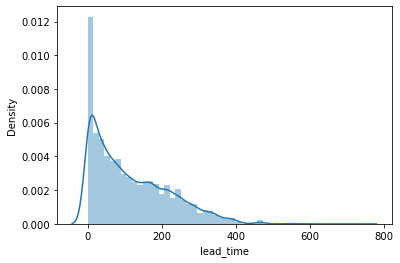

In [71]:
sns.distplot(df['lead_time'])

<AxesSubplot:xlabel='lead_time'>

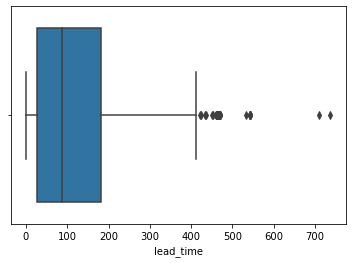

In [72]:
sns.boxplot(df['lead_time'])

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

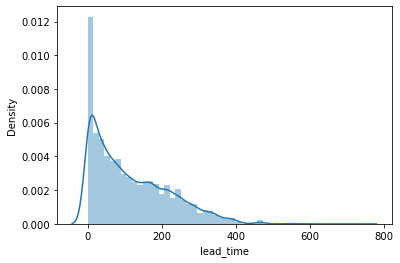

In [73]:
sns.distplot(df['lead_time'].dropna())

<AxesSubplot:xlabel='adr', ylabel='Density'>

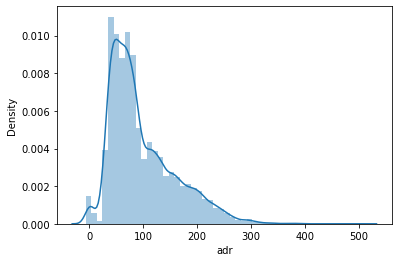

In [74]:
sns.distplot(df['adr'])

<AxesSubplot:xlabel='adr'>

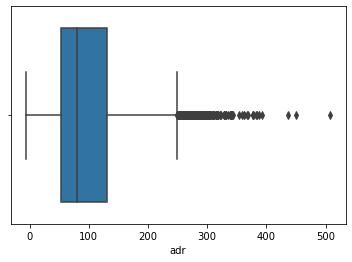

In [75]:
sns.boxplot(df['adr'])

In [76]:
IQR=df1['lead_time'].quantile(0.75)-df1['lead_time'].quantile(0.25)
lower_limit=df1['lead_time'].quantile(0.25)-(IQR*1.5)
upper_limit=df1['lead_time'].quantile(0.75)+(IQR*1.5)

lower_limit , upper_limit

(-205.125, 415.875)

In [77]:
#1. Removing Outliers

outliers_Age=np.where(df1['lead_time']>upper_limit,True,
                         np.where(df1['lead_time']<lower_limit,True,False))

df1_Trimmed= df1.loc[~(outliers_Age),]

df1.shape , df1_Trimmed.shape

((18968, 31), (18890, 31))

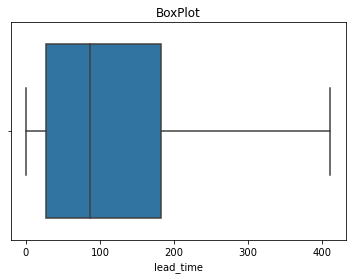

In [78]:
sns.boxplot(df1_Trimmed.lead_time)
plt.title('BoxPlot')
plt.show()

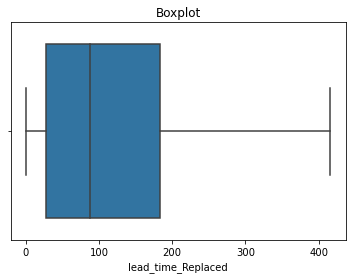

In [79]:
#Outliers are more than 5% so, we can,t Remove outliers directly so we can Replace them
df['lead_time_Replaced']=pd.DataFrame(np.where(df['lead_time']>upper_limit,upper_limit,
                                        np.where(df['lead_time']<lower_limit,lower_limit,df['lead_time'])))

sns.boxplot(df.lead_time_Replaced)
plt.title('Boxplot')
plt.show()

In [80]:
IQR=df1['adr'].quantile(0.75)-df1['adr'].quantile(0.25)
lower_limit=df1['adr'].quantile(0.25)-(IQR*1.5)
upper_limit=df1['adr'].quantile(0.75)+(IQR*1.5)

lower_limit , upper_limit

(-65.99999999999999, 249.2)

In [81]:
#1. Removing Outliers

outliers_adr=np.where(df1['adr']>upper_limit,True,
                         np.where(df1['adr']<lower_limit,True,False))

df1_Trimmed= df1.loc[~(outliers_adr),]

df1.shape , df1_Trimmed.shape

((18968, 31), (18561, 31))

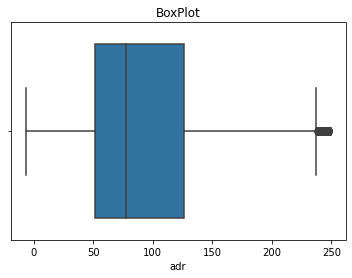

In [82]:
sns.boxplot(df1_Trimmed.adr)
plt.title('BoxPlot')
plt.show()

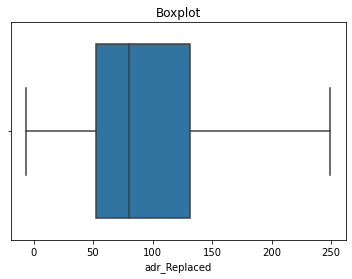

In [83]:
#Outliers are more than 5% so, we can,t Remove outliers directly so we can Replace them
df1['adr_Replaced']=pd.DataFrame(np.where(df1['adr']>upper_limit,upper_limit,
                                        np.where(df1['adr']<lower_limit,lower_limit,df1['adr'])))

sns.boxplot(df1.adr_Replaced)
plt.title('Boxplot')
plt.show()

In [84]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [85]:
## separate dependent & independent features
y=dataframe['is_canceled']
X=dataframe.drop('is_canceled',axis=1)

In [86]:
X.shape,y.shape

((18961, 25), (18961,))

In [87]:
print(X)

          hotel  arrival_date_month      meal  market_segment  \
0      0.578134            0.546982  0.569268        0.376818   
1      0.578134            0.546982  0.569268        0.376818   
2      0.578134            0.546982  0.569268        0.376818   
3      0.578134            0.546982  0.569268        0.262579   
4      0.578134            0.546982  0.569268        0.722559   
...         ...                 ...       ...             ...   
18963  0.578134            0.733668  0.569268        0.722559   
18964  0.578134            0.700831  0.569268        0.722559   
18965  0.578134            0.754134  0.569268        0.722559   
18966  0.578134            0.835422  0.569268        0.359081   
18967  0.578134            0.599800  0.569268        0.722559   

       distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                  0.412453            0.691954      0.542448       0.635198   
1                  0.412453            0.691954      0.5424

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [89]:
#Using GridSearch cv to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [90]:
#Creating a function to calculate best model
def find_best_model(X ,y):
    models = {
        
        'linear_regression': {
            'model':LinearRegression(),
            'parameters': {
                 'normalize':[True,False]
             }       
        },
    
        'lasso':{
            'model':Lasso(),
            'parameters':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'parameters':{
                'criterion':['mse','friedman_mse'],
            }
        },

        'random_forest':{
            'model': RandomForestRegressor(criterion='mse'),
            'parameters':{
                'n_estimators':[5,10,15,20]
            }
        },
        

        'knn':{
           'model': KNeighborsRegressor(algorithm='auto'),
           'parameters':{
               'n_neighbors':[2,5,10,20]
           }
        },
        
        
            
     }
        

    scores = []
    for model_name ,model_params in models.items():
        gs = GridSearchCV(model_params['model'],model_params['parameters'],cv=5,return_train_score=False)
        gs.fit(X,y)
        
        scores.append({
            'model':model_name,
            'best_parameters':gs.best_params_,
            'score':gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X,y)

,model,best_parameters,score
0,linear_regression,{'normalize': False},-3.754871
1,lasso,"{'alpha': 1, 'selection': 'cyclic'}",-1.197897
2,decision_tree,{'criterion': 'mse'},-1.409390
3,random_forest,{'n_estimators': 20},-0.597834
4,knn,{'n_neighbors': 20},-1.128432


In [91]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score

In [92]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [93]:
y_pred=logreg.predict(X_test)

In [94]:
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7616452803656178

In [96]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1509,  835],
       [ 521, 2824]], dtype=int64)

In [97]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,X,y,cv=5)


In [98]:
score

array([0.61956235, 0.75263713, 0.53243671, 0.69066456, 0.73628692])

In [99]:
score.mean()

0.6663175336312394

In [100]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [101]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('GradientBoost', GradientBoostingClassifier()))
models.append(('XGBoost', XGBClassifier()))

In [102]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[1509  521]
 [ 835 2824]]
0.7616452803656178


Naive Bayes
[[1164  257]
 [1180 3088]]
0.7474072772016171


RandomForest
[[2076  282]
 [ 268 3063]]
0.9033222007382669


Decision Tree
[[1969  387]
 [ 375 2958]]
0.8660573035682897


KNN
[[1810  538]
 [ 534 2807]]
0.8115661803480401


AdaBoost
[[1837  404]
 [ 507 2941]]
0.8398664088592019


GradientBoost
[[1887  342]
 [ 457 3003]]
0.8595535243452276


XGBoost
[14:40:18] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2057  321]
 [ 287 3024]]
0.893127087361575




In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid={'n_estimators':[24,64,100,128,200],'max_features':[2,3,4]}

In [105]:
rfc=RandomForestClassifier()

grid=GridSearchCV(rfc,param_grid,cv=5,scoring="accuracy")


grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [24, 64, 100, 128, 200]},
             scoring='accuracy')

In [106]:
grid.best_params_

{'max_features': 4, 'n_estimators': 100}

In [107]:

model=RandomForestClassifier(max_features=4,n_estimators=200)
model.fit(X_train,y_train)


y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)


In [108]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_pred_test,y_test))

0.9936708860759493
0.9045526454561434


In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[2071,  273],
       [ 270, 3075]], dtype=int64)

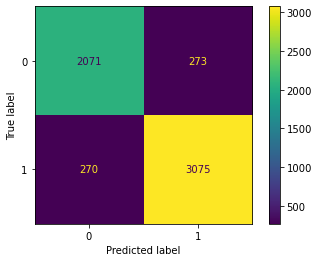

In [110]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2344
           1       0.92      0.92      0.92      3345

    accuracy                           0.90      5689
   macro avg       0.90      0.90      0.90      5689
weighted avg       0.90      0.90      0.90      5689



In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5655
           1       1.00      0.99      0.99      7617

    accuracy                           0.99     13272
   macro avg       0.99      0.99      0.99     13272
weighted avg       0.99      0.99      0.99     13272



In [ ]:
'linear_regression': {
            'model':LinearRegression(),
            'parameters': {
                 'normalize':[True,False]
             }       
        },
    
        'lasso':{
            'model':Lasso(),
            'parameters':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'parameters':{
                'criterion':['mse','friedman_mse'],
            }
        },

        'random_forest':{
            'model': RandomForestRegressor(criterion='mse'),
            'parameters':{
                'n_estimators':[5,10,15,20]
            }
        },
        

        'knn':{
           'model': KNeighborsRegressor(algorithm='auto'),
           'parameters':{
               'n_neighbors':[2,5,10,20]
           }
        },
        

 },
        
        'svr':{
            'model': SVR(),
            'parameters':{
                'gamma':['auto','scale']
            }
        },
        
         'decision_tree':{
            'model': DecisionTreeRegressor(),
            'parameters':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
    
          'random_forest':{
            'model': RandomForestRegressor(criterion='mse'),
            'parameters':{
                'n_estimators':[5,10,15,20]
            }
        },
        
         'knn':{
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters':{
                 'n_estimators':[2,5,10,20]
            }
        }
    